Number of duplicate rows: 0

Processed and Encoded DataFrame Head:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease,Age_MaxHR,Cholesterol_RestingBP
0,-1.433140,0.463654,0.886771,-0.551341,1.384080,-0.851276,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,-1.598184,0.281274
1,-0.478484,1.641229,-0.250184,-0.551341,0.754610,0.118532,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0.021342,-0.479452
2,-1.751359,-0.125133,0.824187,-0.551341,-1.527219,-0.851276,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0,3.051531,-0.194814
3,-0.584556,0.345897,0.104463,-0.551341,-1.133801,0.603436,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1,1.043296,-0.065892
4,0.051881,1.052442,-0.093722,-0.551341,-0.583014,-0.851276,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0.351554,-0.190652



Data Splitting Complete:
Training set shape: (642, 22)
Validation set shape: (138, 22)
Testing set shape: (138, 22)

Feature Importance from Random Forest:


,Feature,Importance
19,ST_Slope_Up,0.141808
18,ST_Slope_Flat,0.094325
8,ChestPainType_ASY,0.089602
2,Cholesterol,0.082369
5,Oldpeak,0.081436
4,MaxHR,0.072160
15,ExerciseAngina_N,0.065559
21,Cholesterol_RestingBP,0.057779
20,Age_MaxHR,0.053393
0,Age,0.053348



Top 5 Most Influential Features:
              Feature  Importance
19        ST_Slope_Up    0.141808
18      ST_Slope_Flat    0.094325
8   ChestPainType_ASY    0.089602
2         Cholesterol    0.082369
5             Oldpeak    0.081436

Optimizing Random Forest with RandomizedSearchCV...

Best hyperparameters for Random Forest: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 13, 'n_estimators': 104}
Best cross-validation F1 score: 0.8778306362171909

Performance Analysis of Optimized Random Forest on Validation Set:
Accuracy: 0.9203
Precision: 0.8837
Recall: 0.9870
F1-score: 0.9325
AUC-ROC: 0.9376


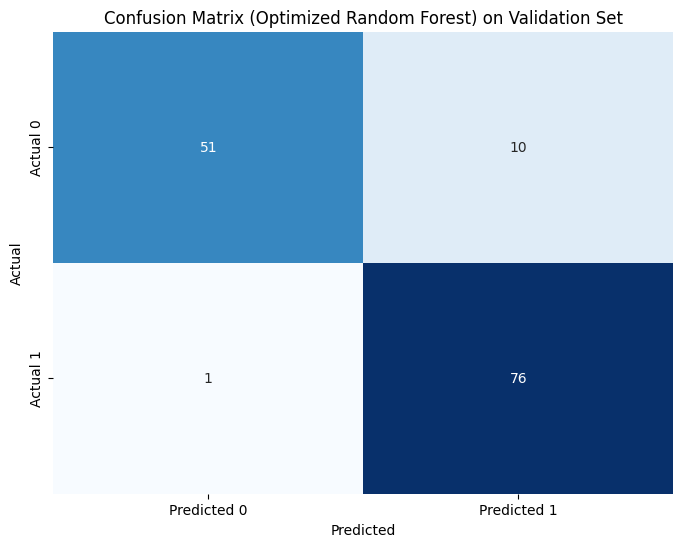


Comparing Optimized Random Forest with other models...
Training and evaluating LogisticRegression...
Training and evaluating SVC...
Training and evaluating GradientBoostingClassifier...

Model Comparison Results on Validation Set:


,best_params,accuracy,precision,recall,f1,roc_auc
RandomForestClassifier,"{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.92029,0.883721,0.987013,0.932515,0.93762
LogisticRegression,{'C': 0.30584494295802445},0.92029,0.892857,0.974026,0.931677,0.941026
SVC,"{'C': 0.6641157902710025, 'gamma': 0.01, 'kern...",0.927536,0.924051,0.948052,0.935897,0.941026
GradientBoostingClassifier,"{'learning_rate': 0.01687770422304368, 'max_de...",0.927536,0.894118,0.987013,0.938272,0.935704


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
)

from scipy.stats import randint, uniform

try:
    df = pd.read_csv("heart.csv")
except FileNotFoundError:
    print("Error: heart.csv not found. Please ensure the file is in the correct directory.")
    exit()
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")
if num_duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicate rows removed.")

numerical_cols_outliers = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
for col in numerical_cols_outliers:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

categorical_features = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
numerical_features = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]
target = "HeartDisease"

numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])
categorical_transformer = Pipeline(
    steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


df_processed = preprocessor.fit_transform(df.drop(target, axis=1))

feature_names = numerical_features + list(
    preprocessor.named_transformers_["cat"]
    .named_steps["onehot"]
    .get_feature_names_out(categorical_features)
)


df_encoded = pd.DataFrame(df_processed, columns=feature_names)

df_encoded[target] = df[target].reset_index(drop=True)


df_encoded["Age_MaxHR"] = df_encoded["Age"] * df_encoded["MaxHR"]
df_encoded["Cholesterol_RestingBP"] = df_encoded["RestingBP"] * df_encoded["Cholesterol"]

scaler_interaction = StandardScaler()
interaction_features = ["Age_MaxHR", "Cholesterol_RestingBP"]
df_encoded[interaction_features] = scaler_interaction.fit_transform(
    df_encoded[interaction_features]
)

print("\nProcessed and Encoded DataFrame Head:")
display(df_encoded.head())

X = df_encoded.drop(target, axis=1)
y = df_encoded[target]

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("\nData Splitting Complete:")
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Testing set shape: {X_test.shape}")

rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf_classifier.fit(X_train, y_train)

print("\nFeature Importance from Random Forest:")
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": feature_importances}
)
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)
display(feature_importance_df)

print("\nTop 5 Most Influential Features:")
print(feature_importance_df.head())
#here i have done modification via optimizeing random forest for better recall and all via ramdomized search cv
print("\nOptimizing Random Forest with RandomizedSearchCV...")
param_dist = {
    "n_estimators": randint(50, 200),
    "max_depth": randint(5, 20),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 10),
    "max_features": ["sqrt", "log2"],
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    random_state=42,
)

random_search.fit(X_train, y_train)

print("\nBest hyperparameters for Random Forest:", random_search.best_params_)
print("Best cross-validation F1 score:", random_search.best_score_)

best_rf_classifier = random_search.best_estimator_

print("\nPerformance Analysis of Optimized Random Forest on Validation Set:")
y_pred_rf = best_rf_classifier.predict(X_val)
y_prob_rf = best_rf_classifier.predict_proba(X_val)[:, 1]

accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf)
recall_rf = recall_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf)
auc_roc_rf = roc_auc_score(y_val, y_prob_rf)

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")
print(f"AUC-ROC: {auc_roc_rf:.4f}")

cm_rf = confusion_matrix(y_val, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=["Predicted 0", "Predicted 1"],
    yticklabels=["Actual 0", "Actual 1"],
)
plt.title("Confusion Matrix (Optimized Random Forest) on Validation Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


print("\nComparing Optimized Random Forest with other models...")

param_distributions = {
    "LogisticRegression": {"C": uniform(0.1, 10)},
    "SVC": {
        "C": uniform(0.1, 10),
        "kernel": ["linear", "rbf"],
        "gamma": ["scale", "auto"] + list(np.logspace(-3, 0, 4)),
    },
    "GradientBoostingClassifier": {
        "n_estimators": randint(50, 200),
        "learning_rate": uniform(0.01, 0.2),
        "max_depth": randint(3, 8),
    },
}


models = {
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=1000),
    "SVC": SVC(
        probability=True, random_state=42
    ),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
}

results = {}

results["RandomForestClassifier"] = {
    "best_params": random_search.best_params_,
    "accuracy": accuracy_rf,
    "precision": precision_rf,
    "recall": recall_rf,
    "f1": f1_rf,
    "roc_auc": auc_roc_rf,
}

for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")

    random_search_other = RandomizedSearchCV(
        model,
        param_distributions=param_distributions[model_name],
        n_iter=20,
        scoring="f1",
        cv=3,
        n_jobs=-1,
        random_state=42,
    )

    random_search_other.fit(X_train, y_train)
    best_model = random_search_other.best_estimator_


    y_pred = best_model.predict(X_val)
    y_prob = best_model.predict_proba(X_val)[:, 1]

    results[model_name] = {
        "best_params": random_search_other.best_params_,
        "accuracy": accuracy_score(y_val, y_pred),
        "precision": precision_score(y_val, y_pred),
        "recall": recall_score(y_val, y_pred),
        "f1": f1_score(y_val, y_pred),
        "roc_auc": roc_auc_score(y_val, y_prob),
    }


results_df = pd.DataFrame(results).T

print("\nModel Comparison Results on Validation Set:")
display(results_df)
